# Project 2-Stage 1

Project 2 was selected which deals with analyzing house prices using advanced regression techniques. We will be using techniques learned from Assignments 1 and 2 such as working with pandas DataFrame API in order to complete stage 1 of the project.

**Objective:** Transform the data into something that can be thoroughly analyzed and extract relevant results from i.e Data Wrangling.

**Collaborators**: Nazim Zerrouki and Shrustishree Sumanth

**References:** 

https://www.kaggle.com/satishgunjal/advanced-reg-techniques-linear-models-top-6
https://www.kaggle.com/akuei0419/housepricepredict02
https://www.kaggle.com/nikkisharma536/house-prediction-dealing-with-outlier

## 2.2 Problem Formulation

### *Introduction*
Housing prices reflect important information of the state of our economy. When housing prices rise, it corresponds to an increase in spending and borrowing from both individuals and businesses which will help improve the economy. Forming an accurate predicion of the value of a house is crucial when, for example, rennovating a home can significantly improve the value of the home relative to the cost of said reconnvation. This corresponds to a lucrative investment for the homeowner which leads to more spending.

As such, the problem we seek to address is one that deals with predicting the value of a house. We intend to use advanced regression techniques combined with extensive feature engineering to address this problem. By devising techniques that lead to accurate predictions, we can identify what qualities drastically impact the value of a home.

### *Data Population*

The dataset provided by the Kaggle competition via the data_description.txt file contains a list of homes found in Ames, Iowes which was created by Dean De Cock. The dataset is comprised of 2390 different sales of residential properties from 2006 to 2010. The sale price of the home is the target value which is influenced by 79 explanatory features. Each record denotes the details of a particular house involved in a sale of residential property. 

## 2.3 Data 

**Accounts:**  nazimz@uw.edu and ssumanth@uw.edu

### *1. Compiling the data*

#### Getting the Data

First, we upload the data as done previously in Assignment 2 and access the directory in which the data was uploaded so it can be retrieved and compiled. This was done by mounting our shared google drive and uploading the specific folder containing the train and test datasets to the google drive.

In [74]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [75]:
os.chdir("/content/drive/MyDrive/project")

#### JSON

##### *Downloading the Data*

We want to retrieve the data so we can thoroughly analyze the architecture of the data.

Each file is represented as an empty directory and stores each row in the csv file into each directory respectively. 

In [76]:
import csv, json
import pandas as pd
import numpy as np
train_file = {}
with open('train.csv') as f:
  csvReader = csv.DictReader(f)
  for rows in csvReader:
    id = rows['Id']
    train_file[id] = rows

test_file = {}
with open('test.csv') as f:
  csvReader = csv.DictReader(f)
  for rows in csvReader:
    id = rows['Id']
    test_file[id] = rows

The train and test files are then converted to a json file such that the data can be thoroughly analyzed in the *Exploring the data* section

In [77]:
with open('train.json', 'w') as f:
  f.write(json.dumps(train_file, indent=4))
with open('test.json', 'w') as f:
  f.write(json.dumps(test_file, indent=4))

The contents of the json files are shown below:

In [78]:
with open("train.json", "rb") as f:
    train_file = json.load(f)
with open('train.json', 'r') as f:
  for i in range(1*84):
    print(i, "\t", repr(f.readline()))

0 	 '{\n'
1 	 '    "1": {\n'
2 	 '        "Id": "1",\n'
3 	 '        "MSSubClass": "60",\n'
4 	 '        "MSZoning": "RL",\n'
5 	 '        "LotFrontage": "65",\n'
6 	 '        "LotArea": "8450",\n'
7 	 '        "Street": "Pave",\n'
8 	 '        "Alley": "NA",\n'
9 	 '        "LotShape": "Reg",\n'
10 	 '        "LandContour": "Lvl",\n'
11 	 '        "Utilities": "AllPub",\n'
12 	 '        "LotConfig": "Inside",\n'
13 	 '        "LandSlope": "Gtl",\n'
14 	 '        "Neighborhood": "CollgCr",\n'
15 	 '        "Condition1": "Norm",\n'
16 	 '        "Condition2": "Norm",\n'
17 	 '        "BldgType": "1Fam",\n'
18 	 '        "HouseStyle": "2Story",\n'
19 	 '        "OverallQual": "7",\n'
20 	 '        "OverallCond": "5",\n'
21 	 '        "YearBuilt": "2003",\n'
22 	 '        "YearRemodAdd": "2003",\n'
23 	 '        "RoofStyle": "Gable",\n'
24 	 '        "RoofMatl": "CompShg",\n'
25 	 '        "Exterior1st": "VinylSd",\n'
26 	 '        "Exterior2nd": "VinylSd",\n'
27 	 '        "MasVnrType": 

In [79]:
with open("test.json", "rb") as f:
    test_file = json.load(f)
with open('test.json', 'r') as f:
  for i in range(1*83):
    print(i, "\t", repr(f.readline()))

0 	 '{\n'
1 	 '    "1461": {\n'
2 	 '        "Id": "1461",\n'
3 	 '        "MSSubClass": "20",\n'
4 	 '        "MSZoning": "RH",\n'
5 	 '        "LotFrontage": "80",\n'
6 	 '        "LotArea": "11622",\n'
7 	 '        "Street": "Pave",\n'
8 	 '        "Alley": "NA",\n'
9 	 '        "LotShape": "Reg",\n'
10 	 '        "LandContour": "Lvl",\n'
11 	 '        "Utilities": "AllPub",\n'
12 	 '        "LotConfig": "Inside",\n'
13 	 '        "LandSlope": "Gtl",\n'
14 	 '        "Neighborhood": "NAmes",\n'
15 	 '        "Condition1": "Feedr",\n'
16 	 '        "Condition2": "Norm",\n'
17 	 '        "BldgType": "1Fam",\n'
18 	 '        "HouseStyle": "1Story",\n'
19 	 '        "OverallQual": "5",\n'
20 	 '        "OverallCond": "6",\n'
21 	 '        "YearBuilt": "1961",\n'
22 	 '        "YearRemodAdd": "1961",\n'
23 	 '        "RoofStyle": "Gable",\n'
24 	 '        "RoofMatl": "CompShg",\n'
25 	 '        "Exterior1st": "VinylSd",\n'
26 	 '        "Exterior2nd": "VinylSd",\n'
27 	 '        "MasVnrT

The train and test files both represent dictionary containing the data of each house encoded in the datasets.

In [80]:
type(train_file)

dict

In [81]:
type(test_file)

dict

**Description:** The train and test files contains rows in which each row represents all of the features for each home. Each row is represented as a dictionary so we can conclude that the train and test files are a list of dictionaries. The key for each dictionary is the id of the home and the value represents all of the features that are observed for each home.

### *2. Data Wrangling*

##### *A. Exploring the data*



Now that we have obtained the data we want to understand its:

**Structure** -- the "shape" of a data file

**Granularity** -- how fine/coarse is each datum

**Scope** -- how (in)complete is the data

**Temporality** -- how is the data situated in time

**Faithfulness** -- how well does the data capture "reality"

First, we analyze the structure of our data. We do this by delving deep into the recursive structure of each file and analyze the keys of the json objects at the top level.

**Note**: This represents the the unique identifier for each home.

In [82]:
train_file.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157'

In [83]:
test_file.keys()

dict_keys(['1461', '1462', '1463', '1464', '1465', '1466', '1467', '1468', '1469', '1470', '1471', '1472', '1473', '1474', '1475', '1476', '1477', '1478', '1479', '1480', '1481', '1482', '1483', '1484', '1485', '1486', '1487', '1488', '1489', '1490', '1491', '1492', '1493', '1494', '1495', '1496', '1497', '1498', '1499', '1500', '1501', '1502', '1503', '1504', '1505', '1506', '1507', '1508', '1509', '1510', '1511', '1512', '1513', '1514', '1515', '1516', '1517', '1518', '1519', '1520', '1521', '1522', '1523', '1524', '1525', '1526', '1527', '1528', '1529', '1530', '1531', '1532', '1533', '1534', '1535', '1536', '1537', '1538', '1539', '1540', '1541', '1542', '1543', '1544', '1545', '1546', '1547', '1548', '1549', '1550', '1551', '1552', '1553', '1554', '1555', '1556', '1557', '1558', '1559', '1560', '1561', '1562', '1563', '1564', '1565', '1566', '1567', '1568', '1569', '1570', '1571', '1572', '1573', '1574', '1575', '1576', '1577', '1578', '1579', '1580', '1581', '1582', '1583', '1584

Then we do the same for the keys at the next level.

In [84]:
train_file['1'].keys()

dict_keys(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'

In [85]:
test_file['1461'].keys()

dict_keys(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'

##### *B. Structure*


Before we even begin to load the data, it often helps to analyze the high-level structure:

*How much data do I have?*

*How is it formatted?*

###### **Structure:** 

The aforementioned analyses above illustrate the structure of our data. Both the train and test datasets yield a recursive format in which the keys of the top level json object represents the unique id of each home. The next level represents the final level of the recursive structure in which the keys of the next level denote the explanatory features that influence the value of the home.

##### C. *How big is the data?*


We often like to start the analysis by getting a rough estimate of the size of the data. This will help inform the tools we use and how we view the data. If it is relatively small, we might use a text editor or a spreadsheet to look at the data. If it is larger, we might jump to more programmatic exploration or even use distributed computing tools.

However here we will use python tools to probe the file.

In [86]:
print("The training dataset is", os.path.getsize('train.csv') / 1e6, "MB")

The training dataset is 0.460676 MB


In [87]:
print("The test dataset is", os.path.getsize('test.csv') / 1e6, "MB")

The test dataset is 0.451405 MB


##### *D. Data Visualization*


To analyze the data in greater detail, we must visualize the data. We do so by creating a data frame that encapsulates data from the train dataset.

First, we want to read and interpret the file to analyze the file encoding.

**Note:** Not understanding the encoding of the file will perturb some of the column's values and cause it to return NaN instead. As such, pandas.read_csv takes in the parameter, encoding, to ensure that file encoding is taken into account when retrieving the data and return the correct results.

In [88]:
with open('train.csv') as f:
    print(f)

<_io.TextIOWrapper name='train.csv' mode='r' encoding='UTF-8'>


We import the train dataset from train.csv to create our train dataframe.

In [89]:
train_data = pd.read_csv('train.csv', na_filter=True, encoding='UTF-8')
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
  train_data[col].fillna(0, inplace=True)
#cat_cols = train_data.columns.tolist()
#for col in numeric_cols:
#  cat_cols.remove(col)
#for col in cat_cols:
#    train_data[col].fillna('None', inplace=True)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We import the test dataset from test.csv to create our test dataframe.

In [90]:
test_data = pd.read_csv('test.csv', na_filter=True, encoding='UTF-8')
numeric_cols = test_data.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
  test_data[col].fillna(0, inplace=True)
#cat_cols = test_data.columns.tolist()
#for col in numeric_cols:
#  cat_cols.remove(col)
#for col in cat_cols:
#    test_data[col].fillna('None', inplace=True)
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


###### **Granularity:**

We can analyze the granularity of our data by creating data visualizations that illustrate the correlation between specific features in relation to the sale price. This way, we can create data visualizations that are most relevant to the problem.

First, we take a look at the statistics of the sales prices of homes because the sale price is the target value we want to predict.

In [91]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We analyze the distribution in the sale price of all homes in the train dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


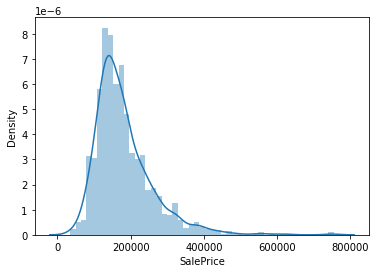

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, spearmanr
sns.distplot(train_data['SalePrice'])

The graph is skewed, so we must address it by transforming the data using logarithm.

Skewness of train data: 1.882876


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


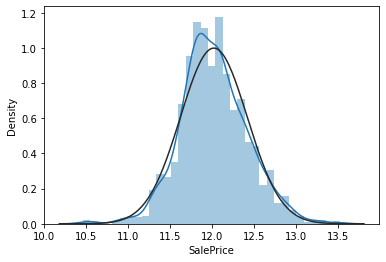

In [93]:
print("Skewness of train data: %f" % train_data['SalePrice'].skew())
sns.distplot(np.log1p(train_data['SalePrice']), fit=norm)

The granularity of the data is observed by analyzing the correlation between every feature in relation to the sale price. This way, we extract the most impactful features for our data visualizations.

In [94]:
train_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.019761,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.013491,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.080997,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.019761,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.049981,0.220347,0.010514,-0.027856,0.120548,-0.012952,0.144494,0.034425,0.221396,0.044018,0.019317,0.165229,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,0.209624
LotArea,-0.033226,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.02

[Text(0.5, 0, 'Id'),
 Text(1.5, 0, 'MSSubClass'),
 Text(2.5, 0, 'LotFrontage'),
 Text(3.5, 0, 'LotArea'),
 Text(4.5, 0, 'OverallQual'),
 Text(5.5, 0, 'OverallCond'),
 Text(6.5, 0, 'YearBuilt'),
 Text(7.5, 0, 'YearRemodAdd'),
 Text(8.5, 0, 'MasVnrArea'),
 Text(9.5, 0, 'BsmtFinSF1'),
 Text(10.5, 0, 'BsmtFinSF2'),
 Text(11.5, 0, 'BsmtUnfSF'),
 Text(12.5, 0, 'TotalBsmtSF'),
 Text(13.5, 0, '1stFlrSF'),
 Text(14.5, 0, '2ndFlrSF'),
 Text(15.5, 0, 'LowQualFinSF'),
 Text(16.5, 0, 'GrLivArea'),
 Text(17.5, 0, 'BsmtFullBath'),
 Text(18.5, 0, 'BsmtHalfBath'),
 Text(19.5, 0, 'FullBath'),
 Text(20.5, 0, 'HalfBath'),
 Text(21.5, 0, 'BedroomAbvGr'),
 Text(22.5, 0, 'KitchenAbvGr'),
 Text(23.5, 0, 'TotRmsAbvGrd'),
 Text(24.5, 0, 'Fireplaces'),
 Text(25.5, 0, 'GarageYrBlt'),
 Text(26.5, 0, 'GarageCars'),
 Text(27.5, 0, 'GarageArea'),
 Text(28.5, 0, 'WoodDeckSF'),
 Text(29.5, 0, 'OpenPorchSF'),
 Text(30.5, 0, 'EnclosedPorch'),
 Text(31.5, 0, '3SsnPorch'),
 Text(32.5, 0, 'ScreenPorch'),
 Text(33.5, 0, 'Poo

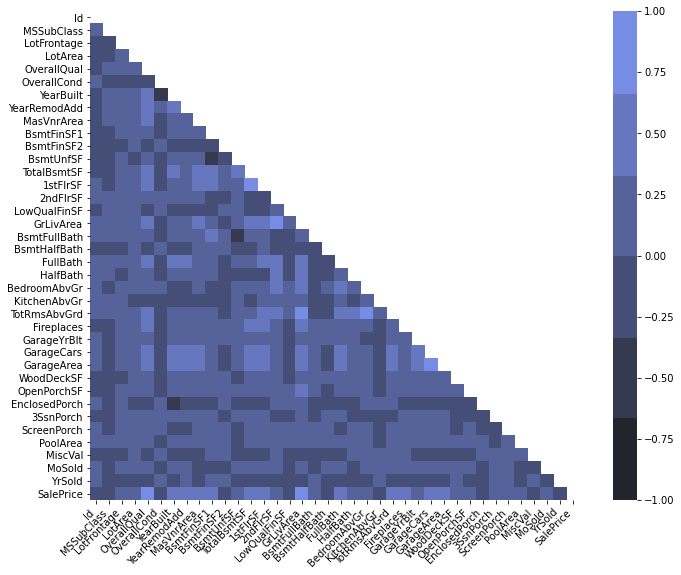

In [95]:
f, ax = plt.subplots(figsize=(12, 9))
mask = np.triu(np.ones_like(train_data.corr(), dtype=bool))
map = sns.heatmap(train_data.corr(), vmin=-1, vmax=1, center=0, mask=mask, cmap=sns.dark_palette((260, 75, 60), input="husl"), square=True)
map.set_xticklabels(map.get_xticklabels(), rotation=45, horizontalalignment='right')

We need the features that have the highest correlation with the sale price.

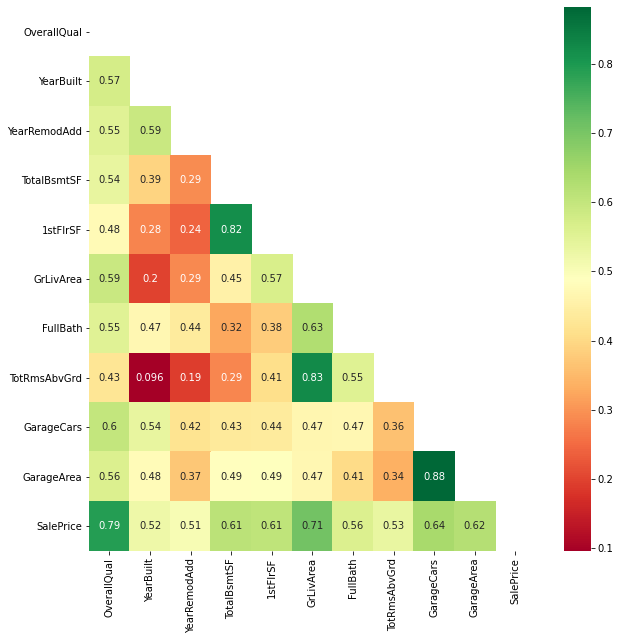

In [96]:
corr = train_data.corr()
highest_correlations = corr.index[abs(corr['SalePrice']) > 0.5]
mask = np.triu(np.ones_like(train_data[highest_correlations].corr(), dtype=bool))
plt.figure(figsize=(10, 10))
g = sns.heatmap(train_data[highest_correlations].corr(), annot=True, mask=mask, cmap="RdYlGn")

In [97]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

After extracting the most relevant features, we can plot all of the pairs of features that have the highest correlation between eachother.

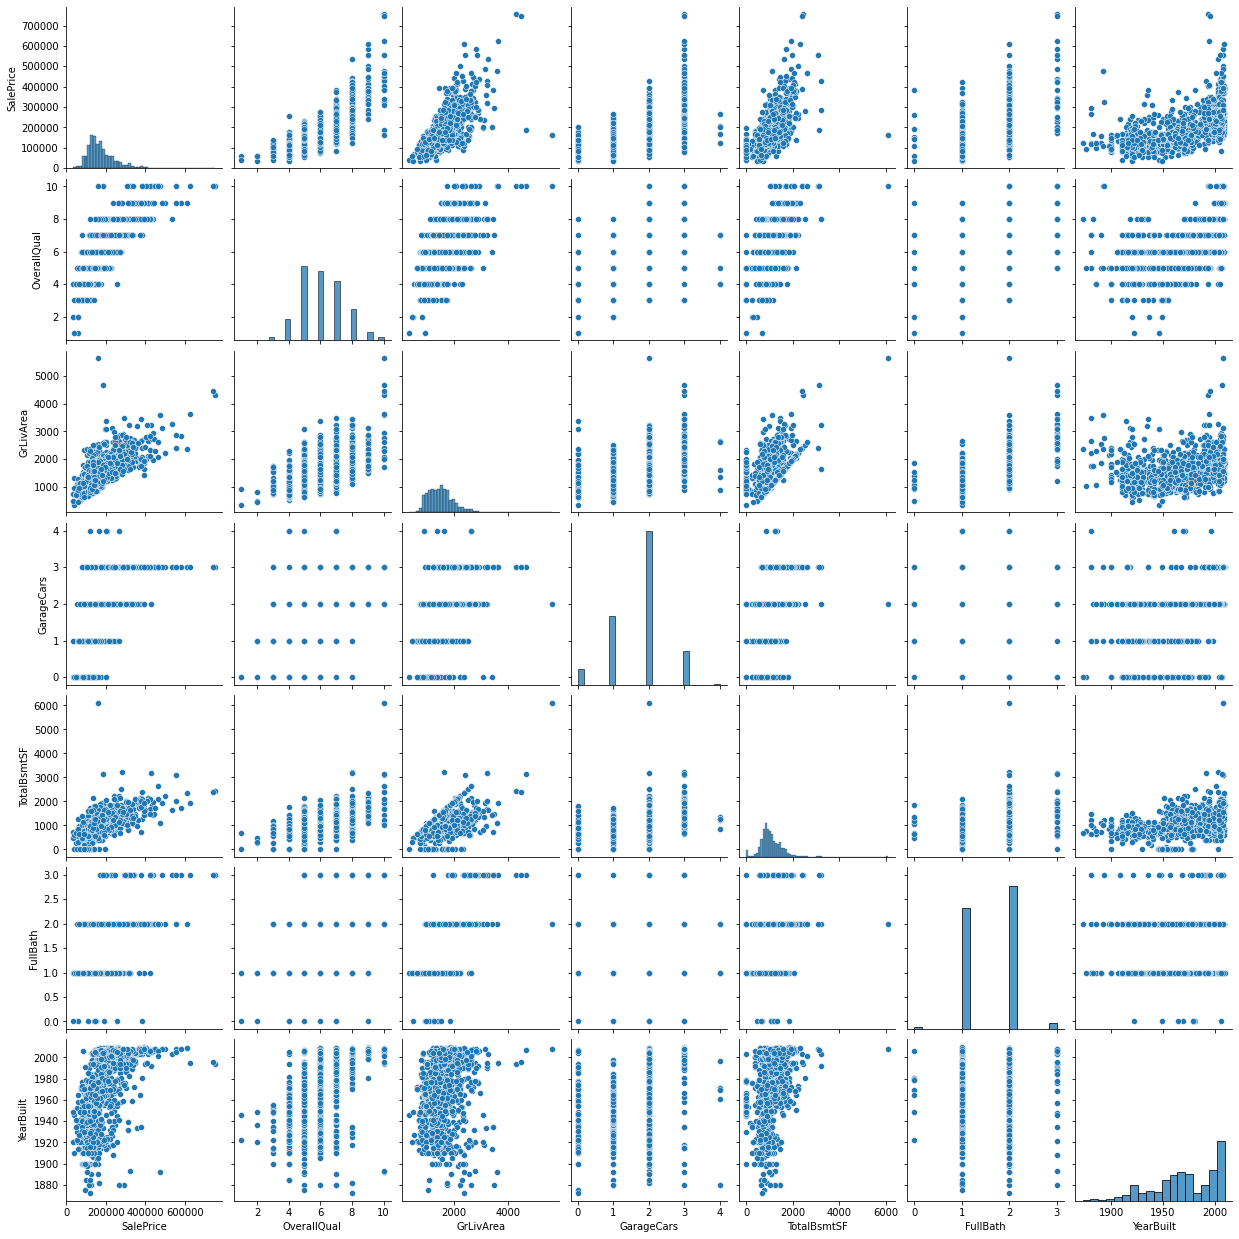

In [98]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols])

###### **Scope:**

There are 2390 different records with each record in the dataset representing the sale of an individual residential property in Ames, Iowa. There were originally a total of 3970 different records within the given timeframe, but some were filtered to only include residential sales, thus only leaving us with 2390 different records to work with.

###### **Temporality:**

Each home was sold between 2006 to 2010. The earliest home was built in 1872 with the newest home being built in 2010. The earliest rennovation was made in 1950 with the latest being 2010. As such, some homes within the dataset represent the value of a modern home within Ames, Iowa whereas some do not as some homes were built early and were either not rennovated, but rennovated many years ago. Naturally homes that were built/rennovated very recently would be homes we would naturally consider above other homes.

In [99]:
train_data['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [100]:
train_data['YearRemodAdd'].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

###### **Faithfulness:**


We first observe the faithfulness of the dataset by filtering out all of the outliers within the dataset. Focusing on outliers, defined by Gladwell as people who do not fit into our normal understanding of achievement. Outliers deals with exceptional people, especially those who are smart, rich, and successful, and those who operate at the extreme outer edge of what is statistically plausible. An outlier is a data point that is distant from other similar points. They may be due to variability in the measurement or may indicate experimental errors. If possible, outliers should be excluded from the data set. We'll do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

In [101]:
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
def detect_outliers():
  outliers = []
  for feature in features:
    subset = []
    index = 0
    threshold = 3
    array = np.array([x for x in train_data[feature].tolist() if isinstance(x, int)])
    mean = np.mean(array)
    std = np.std(array)

    for x in array:
      z_score = (x - mean)/std
      feature_pair = {'Feature': feature, 'Home_ID': index, 'Value': x}
      if np.abs(z_score) > threshold:
        subset.append(feature_pair)
      index = index+1
    outliers.append(subset)
  return outliers

outliers = detect_outliers()
for subset in outliers:
  index = 0
  if len(subset) > 0: 
    print("Feature: " + str(subset[index]['Feature']) + ", Proportion of outliers: " + str(len(subset)/1460 * 100) + "%")
  index = index+1

Feature: MSSubClass, Proportion of outliers: 2.054794520547945%
Feature: LotArea, Proportion of outliers: 0.8904109589041096%
Feature: OverallQual, Proportion of outliers: 0.136986301369863%
Feature: OverallCond, Proportion of outliers: 1.9178082191780823%
Feature: BsmtFinSF1, Proportion of outliers: 0.410958904109589%
Feature: BsmtFinSF2, Proportion of outliers: 3.4246575342465753%
Feature: BsmtUnfSF, Proportion of outliers: 0.7534246575342466%
Feature: TotalBsmtSF, Proportion of outliers: 0.684931506849315%
Feature: 1stFlrSF, Proportion of outliers: 0.821917808219178%
Feature: 2ndFlrSF, Proportion of outliers: 0.273972602739726%
Feature: LowQualFinSF, Proportion of outliers: 1.36986301369863%
Feature: GrLivArea, Proportion of outliers: 1.095890410958904%
Feature: BsmtFullBath, Proportion of outliers: 1.095890410958904%
Feature: BsmtHalfBath, Proportion of outliers: 5.616438356164384%
Feature: HalfBath, Proportion of outliers: 0.821917808219178%
Feature: BedroomAbvGr, Proportion of ou

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


And then we can visualize some of the outliers.

(1460, 81)
(1456, 81)


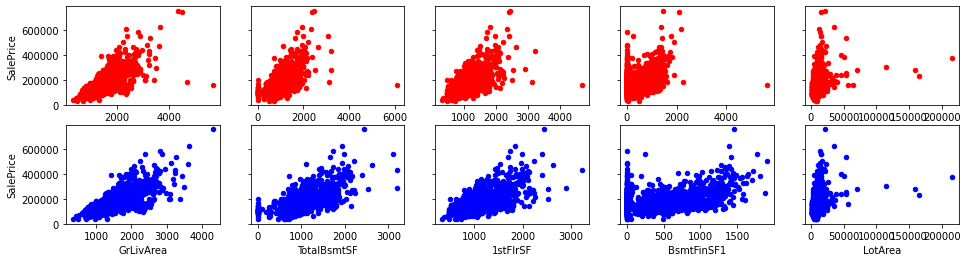

In [102]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))
axes = np.ravel(axes)
#col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']
col_name = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtFinSF1', 'LotArea']
for i, c in zip(range(5), col_name):
    train_data.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')

# delete outliers
print(train_data.shape)
train = train_data[train_data['GrLivArea'] < 4500]
train = train_data[train_data['LotArea'] < 100000]
train = train_data[train_data['TotalBsmtSF'] < 3000]
train = train_data[train_data['1stFlrSF'] < 2500]
train = train_data[train_data['BsmtFinSF1'] < 2000]

print(train.shape)

for i, c in zip(range(5,10), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='b')

Every property in the dataset could be thoroughly observed using its correlation matrix. The data was also imported properly to ensure that no data is missing. 

**Note:** However as we observed, there is a very small proportion of outliers in the dataset when observing features with numerical data. Thus, there is only a very small proportion of data that is unreliable.

### *3. Observations*

The data we obtained is representative of the problem because we can infer which features are most relevant to analyze and only a small proportion of the data contains outliers. According to our visualizations, we can observe the linear relationship between two different features and how they relate to the target value i.e the sale price of homes that we are trying to predict.

To accurately predict the value of a home using this dataset, we would assume that the variables that influence the final sale price remain true across different regions. If that assumption holds true, we can extrapolate the data and results collected and apply it to different datasets involving sales of residential property.

### *4. Sampling*

Compared to the data population, we believe that was used was cluster sampling collected through administrative data in order to retrieve the data. The data was derived from an administrative source with some variables stripped away for usability. 

# Project 2-Stage 2

**References:**

https://www.kaggle.com/satishgunjal/advanced-reg-techniques-linear-models-top-6
https://www.kaggle.com/nikkisharma536/house-prediction-dealing-with-outlier
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

## 1.1 Stage-1

**Data Population**

The Kaggle regression problem represents a sample of the Data Population. The Data Population represents all homes throughout the world.

**Structure**

The structure of data we used is the rectangular data.

**Representation**

We did initially overlook the limitations of the data. Because the data only observes homes from 2006 to 2008 in only one specific area, it is quite limited in scope and is not exactly representative of the Data Population.

## 1.2 Data Transformation and EDA

### *A. Transformations*

We must prepare and transform the data so that it can be trained using a regression model. Not only would this eliminate redundant data, but it will also transform the data into a set that only contains numerical data. Otherwise, it cannot be processed by the model.

Because the ID attribute does not contain any useful information that can be used to predict the saleprice, we will drop the attribute.

In [103]:
train_data.drop('Id', inplace=True, axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
test_ID = test_data['Id']
test_data.drop('Id', inplace=True, axis=1)
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [105]:
corr = train_data.corr()
highest_correlations = corr.index[abs(corr['SalePrice']) > 0.5]
train_data[highest_correlations]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


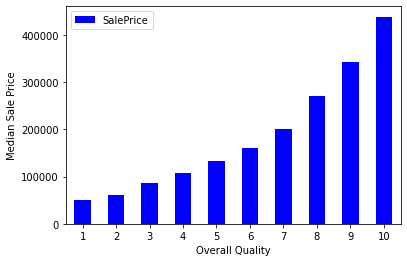

In [106]:
quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


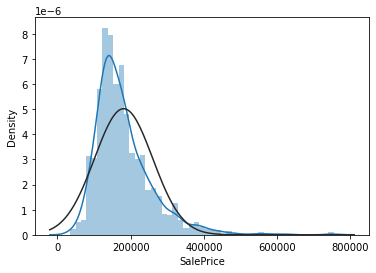

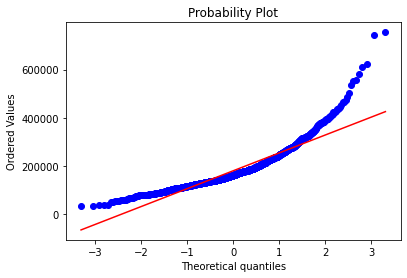

In [107]:
# Histogram and normal probability plot
from scipy import stats
sns.distplot(train_data['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'],plot = plt)

We will check for non-numeric features to encode the data.

In [108]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1456,1456,91,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1448,1456,1456,1456,1419,1419,1418,1419,1418,1456,1456,1456,1455,1456,1456,766,1375,1375,1375,1375,1456,5,280,54,1456,1456
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,925,1309,1455,1050,1378,225,1258,1442,1216,725,1141,1431,514,503,863,906,1278,643,649,1307,953,430,1252,1424,737,1361,1330,735,1356,377,867,605,1307,1322,1336,2,156,49,1266,1198


In [109]:
n = categoricals
for c in n.columns:
    print('{:<14}'.format(c), train[c].unique())

MSZoning       ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street         ['Pave' 'Grvl']
Alley          [nan 'Grvl' 'Pave']
LotShape       ['Reg' 'IR1' 'IR2' 'IR3']
LandContour    ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities      ['AllPub' 'NoSeWa']
LotConfig      ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope      ['Gtl' 'Mod' 'Sev']
Neighborhood   ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1     ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2     ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
BldgType       ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle     ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle      ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl       ['CompShg' 'WdShngl' 'Metal' 'Wd

Transforming and engineering features Here we are using label encoding. Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

In [110]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

cols = ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    if train_data[c].notnull().all():
      lbl = LabelEncoder() 
      lbl.fit(list(train_data[c].values)) 
      train_data[c] = lbl.transform(list(train_data[c].values))
      lbl.fit(list(test_data[c].values)) 
      test_data[c] = lbl.transform(list(test_data[c].values))

And these are the transformed datasets.

In [111]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,NaN,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,BrkFace,196.0,2,4,2,Gd,TA,No,GLQ,706,Unf,0,150,856,1,0,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,2,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,NaN,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,None,0.0,3,4,1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,1,0,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,2,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,NaN,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,BrkFace,162.0,2,4,2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1,0,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,NaN,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,None,0.0,3,4,0,TA,Gd,No,ALQ,216,Unf,0,540,756,1,2,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,2,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,NaN,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,BrkFace,350.0,2,4,2,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1,0,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,2,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,NaN,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,None,0.0,3,4,2,Gd,TA,No,Unf,0,Unf,0,953,953,1,0,1,SBrkr,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,2,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,NaN,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,Stone,119.0,3,4,1,Gd,TA,No,ALQ,790,Rec,163,589,1542,1,4,1,SBrkr,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,2,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,NaN,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,None,0.0,0,2,4,TA,Gd,No,GLQ,275,Unf,0,877,1152,1,0,1,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,2,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,NaN,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,None,0.0,3,4,1,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,1,2,1,FuseA,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,2,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,8,4,142125


In [112]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,NaN,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,None,0.0,3,4,1,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,0,4,1,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,2,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,8,4
1,20,3,81.0,14267,1,NaN,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,BrkFace,108.0,3,4,1,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,0,4,1,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,2,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,8,4
2,60,3,74.0,13830,1,NaN,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,None,0.0,3,4,2,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,0,2,1,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,2,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,8,4
3,60,3,78.0,9978,1,NaN,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,BrkFace,20.0,3,4,2,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,0,0,1,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,2,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,8,4
4,120,3,43.0,5005,1,NaN,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,None,0.0,2,4,2,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,0,0,1,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,2,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,NaN,3,3,0,4,0,10,2,2,3,4,4,7,1970,1970,1,0,5,5,None,0.0,3,4,1,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,0,2,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,2,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,8,4
1455,160,4,21.0,1894,1,NaN,3,3,0,4,0,10,2,2,4,4,4,5,1970,1970,1,0,5,5,None,0.0,3,4,1,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,0,4,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,2,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,8,0
1456,20,3,160.0,20000,1,NaN,3,3,0,4,0,11,2,2,0,2,5,7,1960,1996,1,0,10,12,None,0.0,3,4,1,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,0,0,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,2,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,8,0
1457,85,3,62.0,10441,1,NaN,3,3,0,4,0,11,2,2,0,5,5,5,1992,1992,1,0,6,14,None,0.0,3,4,2,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,0,4,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,2,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,8,4


We want to delete the outliers in the data so our dataset will be more representative of the problem. Outliers aren't appropriate for predicting the saleprice because they fall outside of the norm.

In [113]:
features # Numeric features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [114]:
def detect_and_remove_outliers(inline_delete= True):
    global train_data
    outliers = []
    cnt = 0
    min_percentile = 0.001
    max_percentile = 0.999
    rows = int(np.ceil(len(features)/2))
    for row in range (0, rows):
      for col in range (0, 2):
          # df_outliers = outlier_detection_using_percentile(features[cnt])
          # Outlier detection using percentile
          min_thresold, max_thresold = train_data[features[cnt]].quantile([min_percentile, max_percentile])
          df_outliers = train_data[(train_data[features[cnt]] < min_thresold) | (train_data[features[cnt]] > max_thresold)]

          # Updaing list of outliers
          outliers = outliers + df_outliers.index.tolist()

          if inline_delete: 
              # Drop the outliers inline
              train_data = train_data.drop(df_outliers.index.tolist())
              train_data.reset_index(drop = True, inplace = True)
          cnt = cnt + 1
          if cnt >= len(features):
              break
    unique_outliers= list(set(outliers))
    
    if inline_delete == False: 
        # Drop the unique outliers from final list
        train_data = train_data.drop(unique_outliers)
        train_data.reset_index(drop = True, inplace = True)
              
detect_and_remove_outliers(inline_delete= False)
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,NaN,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,BrkFace,196.0,2,4,2,Gd,TA,No,GLQ,706,Unf,0,150,856,1,0,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,2,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,NaN,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,None,0.0,3,4,1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,1,0,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,2,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,NaN,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,BrkFace,162.0,2,4,2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1,0,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,NaN,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,None,0.0,3,4,0,TA,Gd,No,ALQ,216,Unf,0,540,756,1,2,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,2,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,NaN,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,BrkFace,350.0,2,4,2,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1,0,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,2,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,20,1,62.0,7500,1,Pave,3,3,0,4,0,21,2,2,0,2,7,5,2004,2005,1,1,12,13,None,0.0,2,4,2,Gd,TA,No,GLQ,410,Unf,0,811,1221,1,0,1,SBrkr,1221,0,0,1221,1,0,2,0,2,1,2,6,6,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,2,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,8,4,185000
1413,60,3,62.0,7917,1,NaN,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,None,0.0,3,4,2,Gd,TA,No,Unf,0,Unf,0,953,953,1,0,1,SBrkr,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,2,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,8,4,175000
1414,20,3,85.0,13175,1,NaN,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,Stone,119.0,3,4,1,Gd,TA,No,ALQ,790,Rec,163,589,1542,1,4,1,SBrkr,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,2,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,8,4,210000
1415,70,3,66.0,9042,1,NaN,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,None,0.0,0,2,4,TA,Gd,No,GLQ,275,Unf,0,877,1152,1,0,1,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,2,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,8,4,266500


### B. Features 

We will extract necessary features within the train data and eliminate any redundant data. This ensures that our model will perform faster and will only extrapolate the saleprice based on relevant data.

#### 1. Missing Data

We first analyze the missing data within our dataset, so that we can filter the redundancy out.

In [115]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
null_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
null_data.head(20)

,Total,Percent
PoolQC,1416.0,0.972527
MiscFeature,1369.0,0.940247
Alley,1330.0,0.913462
Fence,1147.0,0.787775
FireplaceQu,675.0,0.463599
GarageQual,73.0,0.050137
GarageCond,73.0,0.050137
GarageType,73.0,0.050137
GarageFinish,73.0,0.050137
BsmtExposure,36.0,0.024725


We will remove the columns that have more than 70% of missing data.

In [116]:
train_data = train_data.dropna(thresh=0.7*len(train_data), axis=1)
test_data = test_data.dropna(thresh=0.7*len(test_data), axis=1)

train_data = train_data.fillna(train_data.mean())
test_data = test_data.fillna(test_data.mean())

In [117]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,BrkFace,196.0,2,4,2,Gd,TA,No,GLQ,706,Unf,0,150,856,1,0,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,Attchd,2003.0,RFn,2,548,TA,TA,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,None,0.0,3,4,1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,1,0,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,Attchd,1976.0,RFn,2,460,TA,TA,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,BrkFace,162.0,2,4,2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1,0,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,Attchd,2001.0,RFn,2,608,TA,TA,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,None,0.0,3,4,0,TA,Gd,No,ALQ,216,Unf,0,540,756,1,2,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,Detchd,1998.0,Unf,3,642,TA,TA,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,BrkFace,350.0,2,4,2,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1,0,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,Attchd,2000.0,RFn,3,836,TA,TA,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [118]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,None,0.0,3,4,1,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,0,4,1,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,2,140,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,BrkFace,108.0,3,4,1,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,0,4,1,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,2,393,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,None,0.0,3,4,2,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,0,2,1,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,2,212,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,BrkFace,20.0,3,4,2,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,0,0,1,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,2,360,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,None,0.0,2,4,2,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,0,0,1,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,2,0,82,0,0,144,0,0,1,2010,8,4


We will encode the remaining columns that still retain missing data.

In [119]:
remaining = [c for c in train_data.columns if train_data[c].isnull().any()]
for c in remaining:
      lbl = LabelEncoder() 
      lbl.fit(list(train_data[c].values)) 
      train_data[c] = lbl.transform(list(train_data[c].values))
      lbl.fit(list(test_data[c].values)) 
      test_data[c] = lbl.transform(list(test_data[c].values))

In [120]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [121]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,0,1,2010,8,4


#### 2. Multicollinear Features

Next, we will remove multicollinear features i.e features that have the highest correlations between eachother by analyzing the VIF score. 

**Note:** The VIF score is a metric that is used to measure the strength of correlation between 2 independent variables.

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def get_highest_vif_feature(df, thresh=5):
    '''
      Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
   
    const = add_constant(df)
    print(f'Shape of data after adding const column: {const.shape}')
    cols = const.columns
    
    # Calculating VIF for each feature
    vif_df = pd.Series([ (variance_inflation_factor(const.values, i)) for i in range(const.shape[1]) ], index= const.columns).to_frame()
    
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    if vif_df.empty:
        print('DataFrame is empty!')
        return None
    else:
        print(f'\nFeatures above VIF threshold: {vif_df.to_dict()}')       
        # Feature with highest VIF value
        return list(vif_df.index)[0]
        print(f'Lets delete the feature with highest VIF value: {list(vif_df.index)[0]}')


# Selecting only numeric features
print(f'Shape of input data: {train_data.shape}')
numeric_feats = train_data.dtypes[train_data.dtypes != "object"].index
print(f"Calculating VIF for {len(numeric_feats)} numerical features")

df_numeric = train_data[numeric_feats]
print(f'Shape of df_numeric: {df_numeric.shape}')
    
feature_to_drop = None
feature_to_drop_list = []
while True:
    feature_to_drop = get_highest_vif_feature(df_numeric, thresh=5)
    print(f'feature_to_drop: {feature_to_drop}')
    if feature_to_drop is None:
        print('No more features to drop!')
        break
    else:
        feature_to_drop_list.append(feature_to_drop)
        df_numeric = df_numeric.drop(feature_to_drop, axis=1)
        print(f'Feature {feature_to_drop} droped from df_numeric')

print(f'\nfeature_to_drop_list: {feature_to_drop_list}')

Shape of input data: (1417, 75)
Calculating VIF for 75 numerical features
Shape of df_numeric: (1417, 75)
Shape of data after adding const column: (1417, 76)


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



Features above VIF threshold: {'VIF': {'BsmtFinSF1': inf, 'GrLivArea': inf, 'LowQualFinSF': inf, '2ndFlrSF': inf, '1stFlrSF': inf, 'TotalBsmtSF': inf, 'BsmtUnfSF': inf, 'BsmtFinSF2': inf, 'SalePrice': 10.481683893151345, 'YearBuilt': 7.298158046944887, 'GarageCars': 6.527329598770923, 'GarageArea': 5.711365996466446, 'MSSubClass': 5.469429707774438, 'TotRmsAbvGrd': 5.169487897075887}}
feature_to_drop: BsmtFinSF1
Feature BsmtFinSF1 droped from df_numeric
Shape of data after adding const column: (1417, 75)


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



Features above VIF threshold: {'VIF': {'1stFlrSF': inf, 'GrLivArea': inf, 'LowQualFinSF': inf, '2ndFlrSF': inf, 'SalePrice': 10.48168389315137, 'YearBuilt': 7.298158046944905, 'TotalBsmtSF': 6.940266387699167, 'GarageCars': 6.527329598770923, 'GarageArea': 5.71136599646645, 'MSSubClass': 5.469429707774438, 'TotRmsAbvGrd': 5.1694878970758955}}
feature_to_drop: 1stFlrSF
Feature 1stFlrSF droped from df_numeric
Shape of data after adding const column: (1417, 74)

Features above VIF threshold: {'VIF': {'GrLivArea': 14.010824134163474, 'SalePrice': 10.481683893151335, '2ndFlrSF': 8.694426152767347, 'YearBuilt': 7.298158046944916, 'TotalBsmtSF': 6.940266387699167, 'GarageCars': 6.527329598770928, 'GarageArea': 5.711365996466446, 'MSSubClass': 5.469429707774438, 'TotRmsAbvGrd': 5.169487897075893}}
feature_to_drop: GrLivArea
Feature GrLivArea droped from df_numeric
Shape of data after adding const column: (1417, 73)

Features above VIF threshold: {'VIF': {'SalePrice': 9.387990142559088, 'YearB

In [123]:
print(f'Shape of training data= {train_data.shape}')
train_data = train_data.drop(['LowQualFinSF'], axis= 1) # Default drop axis is 0 i.e. rows 
train_data.reset_index(drop = True, inplace = True)
print(f'Shape of training data= {train_data.shape}')

Shape of training data= (1417, 75)
Shape of training data= (1417, 74)


#### Numeric Feature Scaling

In order to give every feature the same importance we perform feature scaling. There are many techniques like Min-Max Scalar, Robust Scalar etc. to do feature scaling.
Before we can finalize any scaling technique lets check the skewness of our numeric features. Skewness is the measure of degree of asymmetry of a distribution.
* skewness = 0 : normally distributed.
* skewness > 0 : more weight in the left tail of the distribution.
* skewness < 0 : more weight in the right tail of the distribution.

In [124]:
#Lets check the count of numerical and categorical features
cat_feats = train_data.dtypes[train_data.dtypes == "object"].index
numeric_feats = train_data.dtypes[train_data.dtypes != "object"].index
print(f"Number of categorical features: {len(cat_feats)}, Numerical features: {len(numeric_feats)}")

skew_features = train_data[numeric_feats].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_features})

print(f'Skew in numerical features. Shape of skewness: {skewness.shape}')
skewness.head(10)

# todo add histo and probability plot of skewed features

Number of categorical features: 0, Numerical features: 74
Skew in numerical features. Shape of skewness: (74, 1)


,Skew
Utilities,37.603201
PoolArea,37.603201
Condition2,14.406790
LotArea,10.219215
Heating,9.970767
MiscVal,9.744537
RoofMatl,9.280213
3SsnPorch,9.139477
LandSlope,4.858106
KitchenAbvGr,4.461008


#### Adding New Features

* Since area related features are very important to determine the house price, we will create a new feature by the name 'TotalSF' by adding 'TotalBsmtSF', '1stFlrSF' and '2ndFlrSF'.
* Similarly we will create one more new feature by name 'TotalSF1' by adding 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF' and '2ndFlrSF'. Here 'BsmtFinSF1' and 'BsmtFinSF2' represent finished square feet of all area, that's why we are creating a separate feature using it.
* Create new feature 'YrBltAndRemod' by adding 'YearBuilt' and 'YearRemodAdd'
* Create new feature 'TotalBathrooms' by adding all the bathrooms in the house.
* Create new feature 'TotalPorchSF' by adding all porch area.

In [125]:
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
train_data['TotalSF1'] = train_data['BsmtFinSF1'] + train_data['BsmtFinSF2'] + train_data['1stFlrSF'] +train_data['2ndFlrSF']

train_data['YrBltAndRemod']= train_data['YearBuilt'] + train_data['YearRemodAdd']

train_data['TotalBathrooms'] = (train_data['FullBath'] + (0.5 * train_data['HalfBath']) +
                               train_data['BsmtFullBath'] + (0.5 * train_data['BsmtHalfBath']))

train_data['TotalPorchSF'] = (train_data['OpenPorchSF'] + train_data['3SsnPorch'] +
                              train_data['EnclosedPorch'] +train_data['ScreenPorch'] +
                              train_data['WoodDeckSF'])

print(f'Shape train_data: {train_data.shape}')

Shape train_data: (1417, 79)


In [126]:
test_data['TotalSF'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']
test_data['TotalSF1'] = test_data['BsmtFinSF1'] +test_data['BsmtFinSF2'] + test_data['1stFlrSF'] +test_data['2ndFlrSF']

test_data['YrBltAndRemod']= test_data['YearBuilt'] + test_data['YearRemodAdd']

test_data['TotalBathrooms'] = (test_data['FullBath'] + (0.5 * test_data['HalfBath']) +
                              test_data['BsmtFullBath'] + (0.5 * test_data['BsmtHalfBath']))

test_data['TotalPorchSF'] = (test_data['OpenPorchSF'] + test_data['3SsnPorch'] +
                             test_data['EnclosedPorch'] +test_data['ScreenPorch'] +
                            test_data['WoodDeckSF'])

print(f'Shape test_data: {test_data.shape}')

Shape test_data: (1459, 79)


### C. Modeling

#### 1. Split the Data

We will split the train data into a train subset and test subset, so we can evaluate and test our models.

In [127]:
from sklearn.model_selection import train_test_split
Y_train = train_data['SalePrice']
train_data = train_data.drop(['SalePrice'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(train_data, Y_train, test_size=0.2, random_state=42)

In [128]:
x_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalSF1,YrBltAndRemod,TotalBathrooms,TotalPorchSF
660,60,3,58.0,16770,1,1,3,0,1,0,15,2,2,0,5,7,5,1998,1998,1,1,12,13,1,30.0,2,4,2,2,3,3,5,0,5,0,1195,1195,1,2,1,4,1195,644,1839,0,0,2,1,4,1,3,7,6,0,1,1998.0,0,2,486,4,4,2,0,81,0,0,0,0,0,6,2010,8,4,3034,1839,3996,2.5,81
1388,60,3,60.0,21930,1,2,3,0,4,0,8,6,2,0,5,5,5,2005,2005,1,1,12,13,2,0.0,2,4,2,2,1,0,5,0,5,0,732,732,1,0,1,4,734,1104,1838,0,0,2,1,4,1,3,7,6,1,3,2005.0,0,2,372,4,4,2,100,40,0,0,0,0,0,7,2006,8,4,2570,1838,4010,2.5,140
584,20,3,78.0,7800,1,3,0,0,4,1,7,2,2,0,5,5,8,1948,2002,1,1,8,8,2,0.0,3,2,1,3,1,3,2,603,5,0,293,896,1,0,1,4,1112,896,2008,1,0,3,0,3,1,0,8,6,0,1,1948.0,2,1,230,4,4,2,103,0,0,0,0,0,0,8,2006,8,4,2904,2611,3950,4.0,103
1053,60,1,85.0,10574,1,3,3,0,4,0,21,2,2,0,5,8,5,2005,2006,1,1,12,13,2,0.0,2,4,2,2,3,2,5,0,5,0,1082,1082,1,0,1,4,1082,871,1953,0,0,2,1,3,1,2,9,6,1,1,2005.0,1,3,1043,4,4,2,160,50,0,0,0,0,0,5,2009,8,4,3035,1953,4011,2.5,210
1106,60,3,0.0,10304,1,0,3,0,1,0,14,4,2,0,5,5,7,1976,1976,1,1,9,10,1,44.0,3,2,1,3,3,3,0,381,5,0,399,780,1,0,1,4,1088,780,1868,1,0,2,1,4,1,2,9,6,1,1,1976.0,2,2,484,4,4,2,448,96,0,0,0,0,0,10,2009,8,4,2648,2249,3952,3.5,544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,50,3,65.0,7804,1,3,3,0,4,0,18,2,2,0,0,4,3,1928,1950,1,1,14,10,2,0.0,3,4,0,3,3,3,1,622,5,0,500,1122,1,4,1,4,1328,653,1981,1,0,2,0,4,1,2,7,3,2,5,1981.0,2,2,576,4,4,2,431,44,0,0,0,0,0,12,2009,8,4,3103,2603,3878,3.0,475
1130,20,3,79.0,9541,1,0,3,0,4,0,16,2,2,0,2,7,5,2009,2009,1,1,12,13,3,268.0,2,4,2,2,3,3,5,0,5,0,1502,1502,1,0,1,4,1502,0,1502,0,0,2,0,3,1,2,7,6,0,1,2009.0,1,2,644,4,4,2,0,114,0,0,0,0,0,9,2009,6,5,3004,1502,4018,2.0,114
1294,160,4,24.0,2368,1,3,3,0,4,0,2,2,2,4,5,5,6,1970,1970,1,1,6,6,2,312.0,3,4,1,3,3,3,3,765,5,0,0,765,1,4,1,4,765,600,1365,0,0,1,1,3,1,3,7,2,0,1,1970.0,2,2,440,4,4,2,0,36,0,0,0,0,0,5,2009,8,4,2130,2130,3940,1.5,36
860,50,3,60.0,8064,1,3,3,0,0,0,12,0,2,0,0,5,7,1949,2006,1,1,8,8,2,0.0,3,2,1,3,3,2,5,0,5,0,672,672,1,0,1,4,672,252,924,0,0,1,0,3,1,3,6,6,1,5,2003.0,2,2,576,4,4,2,0,0,0,0,0,0,2000,7,2007,8,4,1596,924,3955,1.0,0


In [129]:
x_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalSF1,YrBltAndRemod,TotalBathrooms,TotalPorchSF
51,90,4,110.0,8472,0,1,0,0,0,1,9,8,2,2,2,5,5,1963,1963,1,1,13,14,2,0.0,1,4,1,2,3,1,3,104,2,712,0,816,1,4,0,4,816,0,816,1,0,1,0,2,1,3,5,6,0,4,1963.0,2,2,516,4,4,2,106,0,0,0,0,0,0,5,2010,8,4,1632,1632,3926,2.0,106
481,20,3,70.0,7535,1,0,3,0,4,0,12,2,2,0,2,5,7,1958,1985,1,1,8,8,2,0.0,3,4,1,3,3,3,1,111,3,279,522,912,1,1,1,4,912,0,912,0,1,1,0,2,1,3,5,6,0,1,1958.0,0,1,297,4,4,2,12,285,0,0,0,0,480,6,2007,8,4,1824,1302,3943,1.5,297
806,30,4,90.0,8100,1,3,3,0,4,0,17,2,2,0,2,5,6,1948,1973,1,1,12,13,2,0.0,3,4,0,3,3,3,4,338,5,0,1221,1559,1,2,1,4,1559,0,1559,1,0,1,0,2,1,3,5,3,0,5,1948.0,2,2,812,4,4,2,0,116,230,0,0,0,0,6,2007,0,4,3118,1897,3921,2.0,346
1260,20,3,75.0,7500,1,3,3,0,4,0,12,2,2,0,2,5,7,1959,1994,3,1,3,3,2,0.0,3,4,1,3,3,3,3,340,4,906,0,1246,1,0,1,4,1246,0,1246,1,0,1,1,3,1,2,6,6,0,1,1959.0,1,1,305,4,4,2,218,0,0,0,0,0,0,5,2010,8,4,2492,2492,3953,2.5,218
297,60,3,116.0,13474,1,3,3,0,4,0,20,1,2,0,5,7,5,1990,1991,1,1,6,10,1,246.0,2,4,1,2,3,3,0,700,5,0,0,700,1,2,1,4,1122,1121,2243,1,0,2,1,4,1,2,8,6,1,1,1990.0,1,3,746,4,4,2,127,44,224,0,0,0,0,6,2007,8,4,2943,2943,3981,3.5,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,60,3,0.0,18800,1,0,3,0,2,0,14,2,2,0,5,6,5,1976,1976,1,1,6,6,1,120.0,3,4,2,2,3,2,2,712,5,0,84,796,1,4,1,4,790,784,1574,1,0,2,1,3,1,3,6,6,1,1,1976.0,0,2,566,4,4,2,306,111,0,0,0,0,0,7,2006,8,4,2370,2286,3952,3.5,417
724,20,3,79.0,9236,1,0,3,0,4,0,5,2,2,0,2,6,5,1997,1997,1,1,12,13,2,0.0,3,2,2,2,3,1,2,1200,5,0,279,1479,1,0,1,4,1494,0,1494,1,0,2,0,3,1,2,6,6,0,1,1997.0,1,2,576,4,4,2,168,27,0,0,0,0,0,7,2006,8,4,2973,2694,3994,3.0,195
894,20,3,79.0,10240,1,3,3,0,4,0,14,2,2,0,2,6,6,1980,1980,1,1,9,10,1,157.0,3,2,1,2,3,3,1,625,3,1061,0,1686,1,4,1,4,1686,0,1686,1,0,2,0,3,1,3,7,6,1,1,1980.0,2,2,612,4,4,2,384,131,0,0,0,0,0,5,2006,8,4,3372,3372,3960,3.0,515
289,60,3,90.0,11700,1,3,3,0,4,0,14,2,2,0,5,6,6,1968,1968,4,1,6,1,1,365.0,2,4,1,3,3,3,0,384,4,175,143,702,1,2,1,4,1041,702,1743,0,1,1,2,3,1,3,7,6,1,1,1968.0,2,2,539,4,4,2,224,0,0,0,0,0,0,6,2007,8,4,2445,2302,3936,2.5,224


In [130]:
y_train

660     221000
1388    192140
584     225000
1053    252000
1106    197500
         ...  
1095    135000
1130    233170
1294    125000
860     122900
1126    224000
Name: SalePrice, Length: 1133, dtype: int64

In [131]:
y_test

51      110000
481     120000
806     153500
1260    154000
297     225000
         ...  
350     190000
724     217000
894     207500
289     175000
188     130000
Name: SalePrice, Length: 284, dtype: int64

#### 2. Data Normalization

In [132]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

Normalization plays a significant role in data preprocessing. Normalization will transform the data into a matrix of values ranging from 0 to 1 without distorting any values or losing information. Some models can't operate effectively without applying some sort of normalization on the data.

RobustScaler will be applied because it transforms the data by scaling features using statistics relative to outliers.

In [133]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
test_data = test_data.drop(['LowQualFinSF'], axis=1)
test = scaler.fit_transform(test_data)

#### 3. Model Selection

We need to select models that we believe would be useful in predicting our data.

In [134]:
x_train

array([[ 0.2       ,  0.        , -0.12820513, ...,  0.5       ,
         1.        , -0.37327189],
       [ 0.2       ,  0.        , -0.07692308, ...,  0.675     ,
         1.        , -0.10138249],
       [-0.6       ,  0.        ,  0.38461538, ..., -0.075     ,
         4.        , -0.2718894 ],
       ...,
       [ 2.2       ,  1.        , -1.        , ..., -0.2       ,
        -1.        , -0.58064516],
       [ 0.        ,  0.        , -0.07692308, ..., -0.0125    ,
        -2.        , -0.74654378],
       [-0.6       ,  0.        , -1.61538462, ...,  0.05      ,
         0.        ,  0.74654378]])

In [135]:
x_test

array([[ 0.8       ,  1.        ,  1.61344538, ..., -0.3533123 ,
         0.        , -0.3111639 ],
       [-0.6       ,  0.        ,  0.26890756, ..., -0.13880126,
        -0.33333333,  0.59619952],
       [-0.4       ,  1.        ,  0.94117647, ..., -0.41640379,
         0.        ,  0.82897862],
       ...,
       [-0.6       ,  0.        ,  0.57142857, ...,  0.07570978,
         0.66666667,  1.63182898],
       [ 0.2       ,  0.        ,  0.94117647, ..., -0.22712934,
         0.33333333,  0.24940618],
       [ 2.2       ,  1.        , -1.27731092, ...,  0.68138801,
         0.        , -0.62470309]])

##### **Model Evaluation**

Now we need to select a model that will best evaluate our data. Two of the models we have selected is LinearRegression and Decision Tree Regressor.

**Linear Regression:** Linear Regression can serve as an effective model because it models the relationship between two variables by assuming there is a strong linear relationship between the two variables. In the case of SalePrice, we deduced earlier that there were many features in our that had a strong linear relationship with SalePrice. As such, we believe that Linear Regression can be very useful for modeling this problem.

**Decision Tree Regressor:** Decision Tree Regressor was also considered for this problem because it evaluates the data by asking a series of questions related to the features within the dataset to predict the target value by splitting the data into smaller subsets. Because there are numerous features of a home and we have eliminated the outliers within the data, we believe that this model can perform accurate decisions that can predict the SalePrice of our data.

##### **Loss Function**

**Linear Regression:** This fits a linear model with specific coefficients to minimize the residual sum of squares between the estimated targets and the observed targets within the dataset. This is called Ordinary Least Squares. It is a statistical technique used to measure the variance within the dataset.

**Decision Tree Regressor:** This model normally uses mean squared error whenever it decides to split a node into two or more child nodes. This means that a node is evaluated as the average of the squared difference between the estimated values and the observed values. However, as we observe later on, the model in question sometimes uses friedman mean squared error which measures the impurity of a node before it is removed or mean absolute error.

##### **Linear Regression Model**

We implement the linear regression model and train it on our train subset.

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, r2_score
from sklearn.compose import TransformedTargetRegressor
import statsmodels.api as sm

# define models to test:
base_models = [("LinearRegression",      LinearRegression()),                     #LinearRegression
               ("Poly",      PolynomialFeatures(degree=2, include_bias=False)),]

In [137]:
models_data = {'intercept':{}, 'r_sq':{}}

In [138]:
model_name = 'LinearRegression'
model = TransformedTargetRegressor(
        regressor=LinearRegression(), 
        func=np.log, inverse_func=np.exp)

model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
r_sq = r2_score(y_train, y_train_pred)

#models_data['coefficients'][model_name] = model.coef_
#models_data['intercept'][model_name] = model.intercept_
#models_data['r_sq'][model_name] = r_sq
print("Train Accuracy of Linear Regression:", r_sq * 100, "%")

y_test_pred = model.predict(x_test)
pred_linear = y_test_pred
r_sq = r2_score(y_test, y_test_pred)
print("Test Accuracy of Linear Regression:", r_sq * 100, "%")

Train Accuracy of Linear Regression: 90.49178959330007 %
Test Accuracy of Linear Regression: 89.14621125391791 %


##### **Decision Tree Regressor**

We implement the Decision Tree Regressor and train it on our train subset. 

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit

regressor = DecisionTreeRegressor()
params = {'max_depth': [1,2,4,6,8,10,12,14,16,18], 'max_features': [10, 20, 30, 40, 50, 60, 70, 75], 'splitter': ['best', 'random'], 'criterion': ['mse', 'friedman_mse', 'mae']}

cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

def func_metric(y, theta):
  return r2_score(y, theta)

# Estimate the parameter(s) with Grid Search and obtain the best model
scoring_fnc = make_scorer(func_metric)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
grid = grid.fit(x_train, y_train)
best_model = grid.best_estimator_

In [67]:
best_model =  TransformedTargetRegressor(
              regressor=best_model, 
              func=np.log, inverse_func=np.exp)
best_model

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(ccp_alpha=0.0,
                                                           criterion='mae',
                                                           max_depth=6,
                                                           max_features=75,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           presort='deprecated',
 

In [68]:
best_model.fit(x_train, y_train)
y_train_pred = best_model.predict(x_train)
score = r2_score(y_train, y_train_pred)
print("Train Accuracy of Decision Tree Regressor: " + str(score * 100) + "%")

y_test_pred = best_model.predict(x_test)
pred_decision = y_test_pred
score = r2_score(y_test, y_test_pred)
print("Test Accuracy of Decision Tree Regressor: " + str(score * 100) + "%")

Train Accuracy of Decision Tree Regressor: 91.31203560585001%
Test Accuracy of Decision Tree Regressor: 75.76867037334998%


In [69]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = model.predict(test)
submission.to_csv('submission1.csv', index=False)
submission

,Id,SalePrice
0,1461,127340.889972
1,1462,166092.211334
2,1463,184958.095787
3,1464,193498.780983
4,1465,185786.563612
...,...,...
1454,2915,93313.271890
1455,2916,70884.682969
1456,2917,180297.915862
1457,2918,139780.363420


# Project 2- Final


## Requirements

### *1. Stage-2*


**Data Types** 

The data is comprised of a combination of null, categorical, and numerical data types. The null and categorical data types had to be filtered out or transformed when processing the data through our models.

**Representation**

Making a slight correction, the data sample ranges from 2006 to 2010 and that made our data quite limited in scope and not necessarily representative of the data population.

### *2. Inference*

We will compare our models i.e LinearRegression and DecisionTreeRegressor. First, we will split the train dataset into numerous consecutive folds using KFold method from the sklearn.model_selection API.

In [70]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def compute_CV_scores(modelA, modelB, X_train, Y_train):
    '''
    Split the training data into 5 subsets.
    For each subset, 
        fit models holding out that subset
        compute the MSE on that subset (the validation set)
    You should be fitting 5 models total.
    Return MSEs and average MSE of modelA and modelB

    Args:
        modelA and modelB: sklearn models with fit and predict functions 
        X_train (data_frame): Data
        Y_train (data_frame): Label 

    Return:
        MSE vector containing 5 errors for modelA
        MSE vector containing 5 errors for modelB
        the average MSE for the 5 splits of modelA
        the average MSE for the 5 splits of modelB
    '''
    kf = KFold(n_splits=5)
    validation_accuracies_A = []
    validation_accuracies_B = []
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train[train_idx], X_train[valid_idx]
        split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx]

        # Fit the modelA on the training split
        modelA.fit(X_train[train_idx], Y_train[train_idx])
        
        # Compute the RMSE on the validation split
        Y_valid_pred = modelA.predict(X_train[valid_idx])
        accuracyA = r2_score(Y_train[valid_idx], Y_valid_pred)
        validation_accuracies_A.append(accuracyA)

        # Fit the modelB on the training split
        modelB.fit(X_train[train_idx], Y_train[train_idx])
        
        # Compute the RMSE on the validation split
        Y_valid_pred = modelB.predict(X_train[valid_idx])
        accuracyB = r2_score(Y_train[valid_idx], Y_valid_pred)

        validation_accuracies_B.append(accuracyB)
        
    return validation_accuracies_A, np.mean(validation_accuracies_A), validation_accuracies_B, np.mean(validation_accuracies_B)

We use this method to compare the two models' performance metrics to eachother to identify the model that should be used to predict the target values.

In [71]:
X_train = scaler.fit_transform(train_data)
linear_accuracies, linear_accuracy, decision_accuracies, decision_accuracy = compute_CV_scores(model, best_model, X_train, Y_train)
print("Linear Regression: " + str(linear_accuracy * 100) + "% " "Decision Tree Regressor: " + str(decision_accuracy*100) + "%")

Linear Regression: 88.79360848212644% Decision Tree Regressor: 79.81429876391034%


Judging by our model, we can determine that the linear regression model performs better on average considering how the average performance metric evaluated i.e average regression score is greater than it is for the decision tree regressor. However, we need to use a more accurate comparison metric. 

We need to make a statistical inference to conclude which model is better. We will use student t-test to accomplish this.

In [72]:
from scipy.stats import ttest_ind
ttest_ind(linear_accuracies, decision_accuracies, equal_var=False)

Ttest_indResult(statistic=7.233293702761275, pvalue=0.000436065562827401)

The significance level is below 0.05. Thus, we conclude that the average accuracy computed by the Linear Regression Model is significantly better than the average accuracy of our Decision Tree Regressor at a confidence level of 95%.

### *1.3 Conclusions and Learnings*

Throughout this project, we understood how to compile our data, analyze our data thoroughly, learned how to transform our data for data preprocessing, and select features that are most relevant for predicting our target values. We learned how to select, evaluate, and compare two models together so that we can select the model that is most suitable for our problem. Our findings conclude that Linear Regression is the superior model compared to Decision Tree Regression by making a statistical inference using student t-test. 



### *1.4 Submission*

In [73]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = model.predict(test)
submission.to_csv('submission_final.csv', index=False)
submission

,Id,SalePrice
0,1461,132007.912572
1,1462,165174.474520
2,1463,181696.339652
3,1464,192505.673489
4,1465,194530.756893
...,...,...
1454,2915,90239.018888
1455,2916,66546.700940
1456,2917,179904.665954
1457,2918,148200.350436
